# Simple walk-through of fast-marching concept #
C. Fandel 2021

<br>pyKasso library developed by François Miville, Philippe Renard, & Chloé Fandel: https://github.com/randlab/pyKasso
<br>AGD-HFM Library developed by J-M Mirebeau: https://github.com/mirebeau/HamiltonFastMarching
- Documentation & worked examples: https://nbviewer.jupyter.org/github/Mirebeau/AdaptiveGridDiscretizations/blob/master/Notebooks_FMM/Riemannian.ipynb
- Simple conceptual explanations of fast marching approaches: 
   - Isotropic: https://math.berkeley.edu/~sethian/2006/Explanations/fast_marching_explain.html
   - Anisotropic: https://math.berkeley.edu/~sethian/2006/Explanations/ordered_upwind_explain.html

**Installation**
<br>First install the necessary packages.<br>
Clone the AGD repository from GitHub, then create an environment using the environment file: <br>
`conda env create --file agd-hfm.yaml` <br>
    
Or install directly with conda: <br>
`conda install agd -c agd-lbr`

## Imports ##

In [1]:
#Import pykasso:
import sys
sys.path.append('C:/Users/Chloe/Documents/GitHub/pyKasso/pykasso') #path to local version of package
import base as pk  #in this case, "base" is the name of the .py file with all of the pykasso functions in it
    
#Import standard modules:
import os            
#import sys           
import importlib
#import copy
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
#import karstnet as kn

#all fast-marching-related imports
import agd
from agd import Eikonal
from agd.Metrics import Riemann

os.getcwd()

'C:\\Users\\Chloe\\Documents\\GitHub\\pyKasso\\notebooks'

## Isotropic & homogeneous ##

CAUTION: You are using the development version of this package.

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


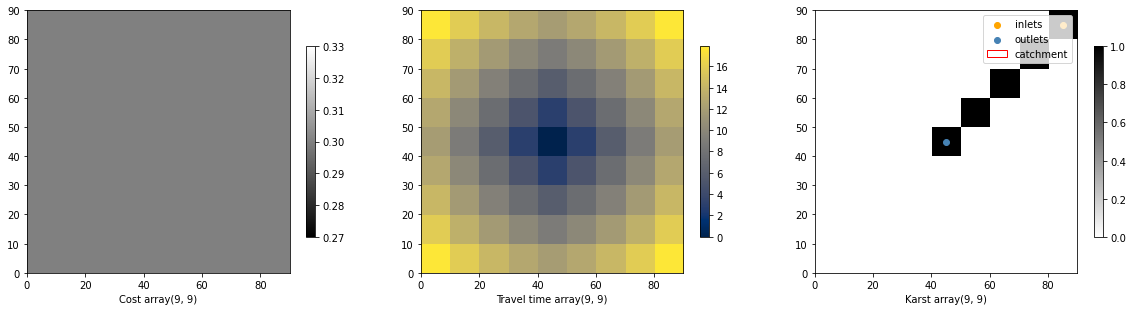

In [2]:
importlib.reload(pk)

#Load model:
catchment = pk.SKS('inputs/example/settings.yaml') 

#Run isotropic conduit network simulation with uniform cost & display results:
catchment.compute_karst_network()
catchment.show()

[]

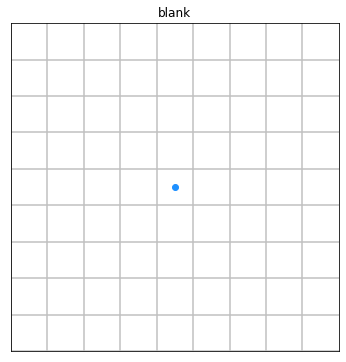

In [4]:
#Plot blank domain to use as a base for other figures:
#Plot figure:
f = plt.figure(figsize=(20,15))
ax = f.add_subplot(131, aspect='equal')
ax.set_title('blank')

im = plt.imshow(catchment.get_geology(), origin='lower', extent=catchment.grid.extent, cmap='gray_r', alpha=0)
plt.scatter(catchment.outlets[:,0],catchment.outlets[:,1], c='dodgerblue')

for x in range(catchment.grid.xnum):
    plt.plot([x*catchment.grid.dx,x*catchment.grid.dx],[catchment.grid.ymin,catchment.grid.ymax], c='silver')
for y in range(catchment.grid.ynum):
    plt.plot([catchment.grid.xmin,catchment.grid.xmax],[y*catchment.grid.dy,y*catchment.grid.dy], c='silver')

ax.set_yticks([]) 
ax.set_xticks([])

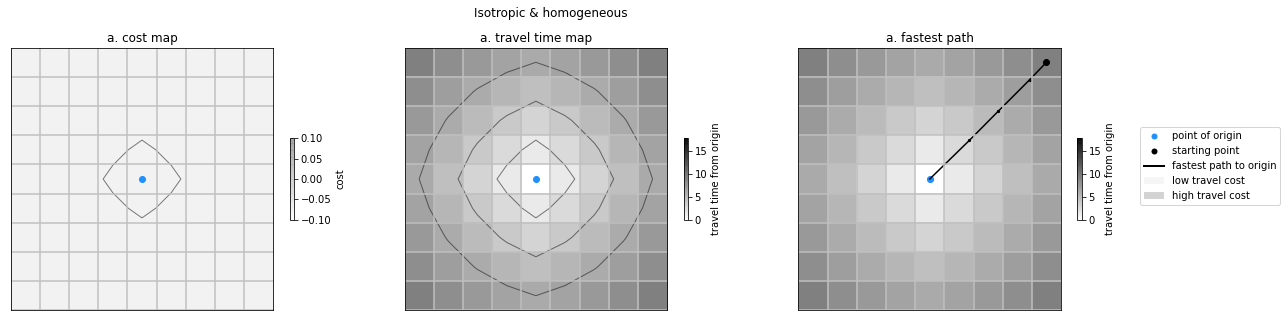

In [12]:
#Plot isotropic & homogeneous results:
f = plt.figure(figsize=(20,5))
f.suptitle('Isotropic & homogeneous')
ax = f.add_subplot(131, aspect='equal')
ax.set_title('a. cost map')

im = plt.imshow(catchment.get_geology(), origin='lower', extent=catchment.grid.extent, cmap='gray_r', alpha=0.1)
c = plt.contour(catchment.grid.X,catchment.grid.Y, catchment.maps['time'][0], colors=['k'], alpha=0.5, linewidths=1, levels=[4])
#plt.clabel(c, inline=True, inline_spacing=20, fontsize=10, fmt='%1.0f', rightside_up=False, use_clabeltext=True)

plt.scatter(catchment.outlets[:,0],catchment.outlets[:,1], c='dodgerblue')

for x in range(catchment.grid.xnum):
    plt.plot([x*catchment.grid.dx,x*catchment.grid.dx],[catchment.grid.ymin,catchment.grid.ymax], c='silver')
for y in range(catchment.grid.ynum):
    plt.plot([catchment.grid.xmin,catchment.grid.xmax],[y*catchment.grid.dy,y*catchment.grid.dy], c='silver')

plt.colorbar(im, shrink=0.3, label='cost')
ax.set_yticks([]) 
ax.set_xticks([])


##########################################
ax = f.add_subplot(132, aspect='equal')
ax.set_title('a. travel time map')

im = plt.imshow(catchment.maps['time'][0], origin='lower', extent=catchment.grid.extent, cmap='gray_r', alpha=0.5)
c = plt.contour(catchment.grid.X,catchment.grid.Y, catchment.maps['time'][0], colors=['k'], alpha=0.5, linewidths=1, levels=[4,8,12])
#plt.clabel(c, inline=True, inline_spacing=20, fontsize=10, fmt='%1.0f', rightside_up=False, use_clabeltext=True)

plt.scatter(catchment.outlets[:,0],catchment.outlets[:,1], c='dodgerblue')

for x in range(catchment.grid.xnum):
    plt.plot([x*catchment.grid.dx,x*catchment.grid.dx],[catchment.grid.ymin,catchment.grid.ymax], c='silver')
for y in range(catchment.grid.ynum):
    plt.plot([catchment.grid.xmin,catchment.grid.xmax],[y*catchment.grid.dy,y*catchment.grid.dy], c='silver')

plt.colorbar(im, shrink=0.3, label='travel time from origin')
ax.set_yticks([]) 
ax.set_xticks([])

##########################################
ax = f.add_subplot(133, aspect='equal')
ax.set_title('a. fastest path')

im = plt.imshow(catchment.maps['time'][0], origin='lower', extent=catchment.grid.extent, cmap='gray_r', alpha=0.5)
catchment.show_network(ax=ax, data=catchment.karst_simulations[0], simplify=False, labels=[], plot_nodes=True, legend=False, color='k')

plt.scatter(catchment.inlets[:,0], catchment.inlets[:,1],  c='k')
plt.scatter(catchment.outlets[:,0],catchment.outlets[:,1], c='dodgerblue')

for x in range(catchment.grid.xnum):
    plt.plot([x*catchment.grid.dx,x*catchment.grid.dx],[catchment.grid.ymin,catchment.grid.ymax], c='silver')
for y in range(catchment.grid.ynum):
    plt.plot([catchment.grid.xmin,catchment.grid.xmax],[y*catchment.grid.dy,y*catchment.grid.dy], c='silver')

ax.set_yticks([]) 
ax.set_xticks([])
plt.colorbar(im, shrink=0.3, label='travel time from origin')

legend = [matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='dodgerblue', markeredgecolor='none', label='point of origin'),
          matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='k', markeredgecolor='none', label='starting point'),
          matplotlib.lines.Line2D([0], [0], color='k', lw=2, label='fastest path to origin'),
          matplotlib.patches.Patch(facecolor='whitesmoke', label='low travel cost'),
          matplotlib.patches.Patch(facecolor='lightgray',  label='high travel cost')
         ]
plt.legend(handles=legend, loc=[1.3,0.4])

## Isotropic & heterogeneous ##

CAUTION: You are using the development version of this package.
- initialize_costMap() - Warning : no geology n 0 found.

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


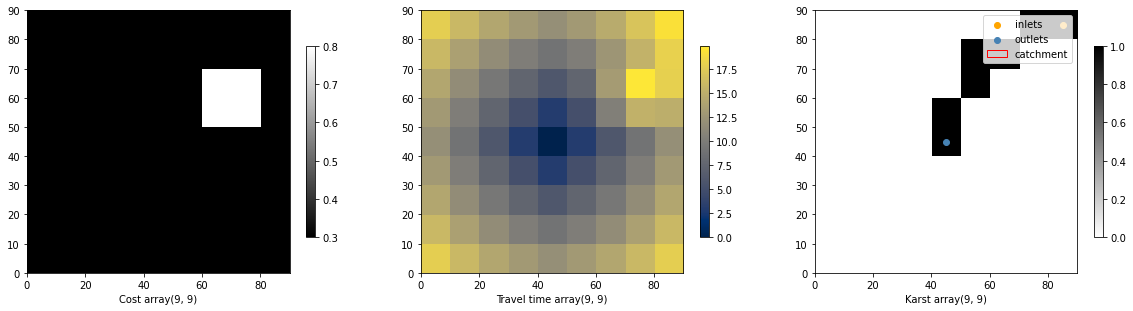

In [13]:
importlib.reload(pk)

#Load model:
catchment = pk.SKS('inputs/example/settings.yaml') 

#Run isotropic simulation with high-cost obstacles & display result:
catchment.set_geological_mode('csv')
catchment.update_all()
catchment.compute_karst_network()
catchment.show()

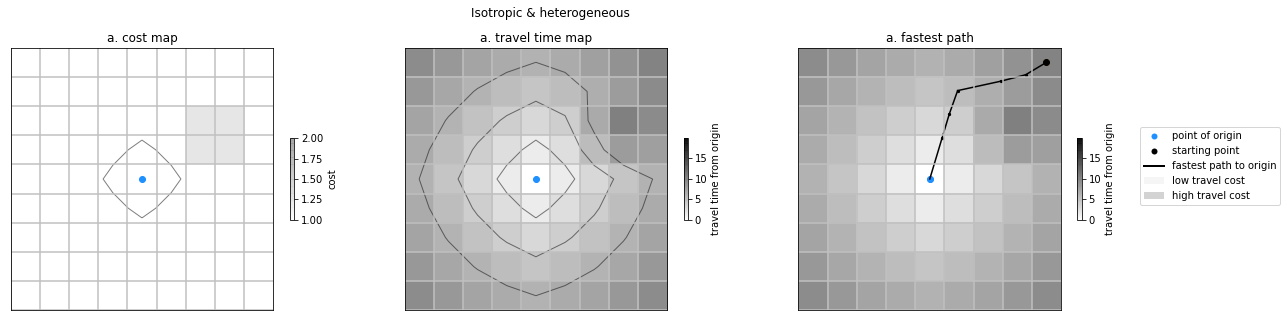

In [14]:
#Plot figure:
f = plt.figure(figsize=(20,5))
f.suptitle('Isotropic & heterogeneous')
ax = f.add_subplot(131, aspect='equal')
ax.set_title('a. cost map')

im = plt.imshow(catchment.get_geology(), origin='lower', extent=catchment.grid.extent, cmap='gray_r', alpha=0.1)
c = plt.contour(catchment.grid.X,catchment.grid.Y, catchment.maps['time'][0], colors=['k'], alpha=0.5, linewidths=1, levels=[4])
#plt.clabel(c, inline=True, inline_spacing=20, fontsize=10, fmt='%1.0f', rightside_up=False, use_clabeltext=True)

plt.scatter(catchment.outlets[:,0],catchment.outlets[:,1], c='dodgerblue')

for x in range(catchment.grid.xnum):
    plt.plot([x*catchment.grid.dx,x*catchment.grid.dx],[catchment.grid.ymin,catchment.grid.ymax], c='silver')
for y in range(catchment.grid.ynum):
    plt.plot([catchment.grid.xmin,catchment.grid.xmax],[y*catchment.grid.dy,y*catchment.grid.dy], c='silver')

plt.colorbar(im, shrink=0.3, label='cost')
ax.set_yticks([]) 
ax.set_xticks([])


##########################################
ax = f.add_subplot(132, aspect='equal')
ax.set_title('a. travel time map')

im = plt.imshow(catchment.maps['time'][0], origin='lower', extent=catchment.grid.extent, cmap='gray_r', alpha=0.5)
c = plt.contour(catchment.grid.X,catchment.grid.Y, catchment.maps['time'][0], colors=['k'], alpha=0.5, linewidths=1, levels=[4,8,12])
#plt.clabel(c, inline=True, inline_spacing=20, fontsize=10, fmt='%1.0f', rightside_up=False, use_clabeltext=True)

plt.scatter(catchment.outlets[:,0],catchment.outlets[:,1], c='dodgerblue')

for x in range(catchment.grid.xnum):
    plt.plot([x*catchment.grid.dx,x*catchment.grid.dx],[catchment.grid.ymin,catchment.grid.ymax], c='silver')
for y in range(catchment.grid.ynum):
    plt.plot([catchment.grid.xmin,catchment.grid.xmax],[y*catchment.grid.dy,y*catchment.grid.dy], c='silver')

plt.colorbar(im, shrink=0.3, label='travel time from origin')
ax.set_yticks([]) 
ax.set_xticks([])

##########################################
ax = f.add_subplot(133, aspect='equal')
ax.set_title('a. fastest path')

im = plt.imshow(catchment.maps['time'][0], origin='lower', extent=catchment.grid.extent, cmap='gray_r', alpha=0.5)
catchment.show_network(ax=ax, data=catchment.karst_simulations[0], simplify=False, labels=[], plot_nodes=True, legend=False, color='k')

plt.scatter(catchment.inlets[:,0], catchment.inlets[:,1],  c='k')
plt.scatter(catchment.outlets[:,0],catchment.outlets[:,1], c='dodgerblue')

for x in range(catchment.grid.xnum):
    plt.plot([x*catchment.grid.dx,x*catchment.grid.dx],[catchment.grid.ymin,catchment.grid.ymax], c='silver')
for y in range(catchment.grid.ynum):
    plt.plot([catchment.grid.xmin,catchment.grid.xmax],[y*catchment.grid.dy,y*catchment.grid.dy], c='silver')

ax.set_yticks([]) 
ax.set_xticks([])
plt.colorbar(im, shrink=0.3, label='travel time from origin')

legend = [matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='dodgerblue', markeredgecolor='none', label='point of origin'),
          matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='k', markeredgecolor='none', label='starting point'),
          matplotlib.lines.Line2D([0], [0], color='k', lw=2, label='fastest path to origin'),
          matplotlib.patches.Patch(facecolor='whitesmoke', label='low travel cost'),
          matplotlib.patches.Patch(facecolor='lightgray',  label='high travel cost')
         ]
plt.legend(handles=legend, loc=[1.3,0.4])

## Anisotropic & heterogeneous ##

CAUTION: You are using the development version of this package.
- initialize_costMap() - Warning : no geology n 0 found.

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


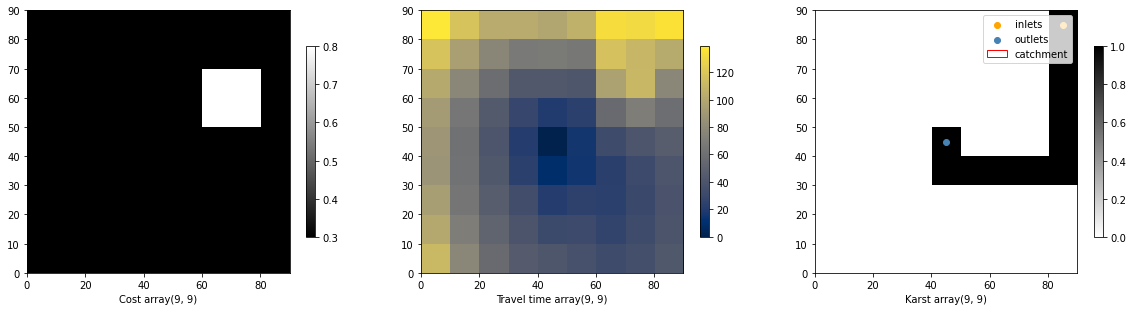

In [15]:
importlib.reload(pk)

#Load model:
catchment = pk.SKS('inputs/example/settings.yaml') 

#Run anisotropic conduit network simulation & display results:
catchment.set_algorithm('Riemann2')
catchment.set_geological_mode('csv')
catchment.update_all()
catchment.compute_karst_network()
catchment.show()

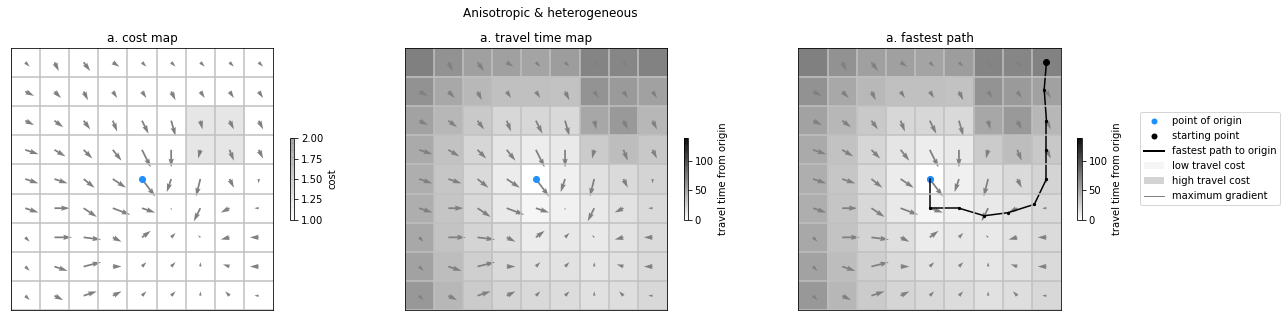

In [17]:
#Plot figure:
f = plt.figure(figsize=(20,5))
f.suptitle('Anisotropic & heterogeneous')
ax = f.add_subplot(131, aspect='equal')
ax.set_title('a. cost map')

im = plt.imshow(catchment.get_geology(), origin='lower', extent=catchment.grid.extent, cmap='gray_r', alpha=0.1)
q = plt.quiver(catchment.grid.X, catchment.grid.Y,
    -1*catchment.geology.data['orientationy']['data'], -1*catchment.geology.data['orientationx']['data'], scale=3, color='gray')
#c = plt.contour(catchment.grid.X,catchment.grid.Y, catchment.maps['time'][0], colors=['k'], alpha=0.5, linewidths=1, levels=[15])
#plt.clabel(c, inline=True, inline_spacing=20, fontsize=10, fmt='%1.0f', rightside_up=False, use_clabeltext=True)

plt.scatter(catchment.outlets[:,0],catchment.outlets[:,1], c='dodgerblue')

for x in range(catchment.grid.xnum):
    plt.plot([x*catchment.grid.dx,x*catchment.grid.dx],[catchment.grid.ymin,catchment.grid.ymax], c='silver')
for y in range(catchment.grid.ynum):
    plt.plot([catchment.grid.xmin,catchment.grid.xmax],[y*catchment.grid.dy,y*catchment.grid.dy], c='silver')

plt.colorbar(im, shrink=0.3, label='cost')
ax.set_yticks([]) 
ax.set_xticks([])


##########################################
ax = f.add_subplot(132, aspect='equal')
ax.set_title('a. travel time map')

im = plt.imshow(catchment.maps['time'][0], origin='lower', extent=catchment.grid.extent, cmap='gray_r', alpha=0.5)
q = plt.quiver(catchment.grid.X, catchment.grid.Y,
    -1*catchment.geology.data['orientationy']['data'], -1*catchment.geology.data['orientationx']['data'], scale=3, color='gray')
#c = plt.contour(catchment.grid.X,catchment.grid.Y, catchment.maps['time'][0], colors=['k'], alpha=0.5, linewidths=1, levels=[15,30,45])
#plt.clabel(c, inline=True, inline_spacing=20, fontsize=10, fmt='%1.0f', rightside_up=False, use_clabeltext=True)

plt.scatter(catchment.outlets[:,0],catchment.outlets[:,1], c='dodgerblue')

for x in range(catchment.grid.xnum):
    plt.plot([x*catchment.grid.dx,x*catchment.grid.dx],[catchment.grid.ymin,catchment.grid.ymax], c='silver')
for y in range(catchment.grid.ynum):
    plt.plot([catchment.grid.xmin,catchment.grid.xmax],[y*catchment.grid.dy,y*catchment.grid.dy], c='silver')

plt.colorbar(im, shrink=0.3, label='travel time from origin')
ax.set_yticks([]) 
ax.set_xticks([])

##########################################
ax = f.add_subplot(133, aspect='equal')
ax.set_title('a. fastest path')

im = plt.imshow(catchment.maps['time'][0], origin='lower', extent=catchment.grid.extent, cmap='gray_r', alpha=0.5)
q = plt.quiver(catchment.grid.X, catchment.grid.Y,
    -1*catchment.geology.data['orientationy']['data'], -1*catchment.geology.data['orientationx']['data'], scale=3, color='gray')
catchment.show_network(ax=ax, data=catchment.karst_simulations[0], simplify=False, labels=[], plot_nodes=True, legend=False, color='k')

plt.scatter(catchment.inlets[:,0], catchment.inlets[:,1],  c='k')
plt.scatter(catchment.outlets[:,0],catchment.outlets[:,1], c='dodgerblue')

for x in range(catchment.grid.xnum):
    plt.plot([x*catchment.grid.dx,x*catchment.grid.dx],[catchment.grid.ymin,catchment.grid.ymax], c='silver')
for y in range(catchment.grid.ynum):
    plt.plot([catchment.grid.xmin,catchment.grid.xmax],[y*catchment.grid.dy,y*catchment.grid.dy], c='silver')

ax.set_yticks([]) 
ax.set_xticks([])
plt.colorbar(im, shrink=0.3, label='travel time from origin')

legend = [matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='dodgerblue', markeredgecolor='none', label='point of origin'),
          matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='k', markeredgecolor='none', label='starting point'),
          matplotlib.lines.Line2D([0], [0], color='k', lw=2, label='fastest path to origin'),
          matplotlib.patches.Patch(facecolor='whitesmoke', label='low travel cost'),
          matplotlib.patches.Patch(facecolor='lightgray',  label='high travel cost'),
          matplotlib.lines.Line2D([0], [0], color='gray', lw=1, label='maximum gradient')
         ]
plt.legend(handles=legend, loc=[1.3,0.4])